# Machine Learning

#### Mert Hüseyin UZAN
#### Dataset: WNBA Player stats Season 2016-2017, Chronic Kidney Disease, FIFA 18
#### Dataset url: https://www.kaggle.com/jinxbe/wnba-player-stats-2017, https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease, https://www.kaggle.com/oliversinn/fifa-18-visualisation-clustering-ml/data

### Part 1 : Regression :
#### Predicting Played Minutes on WNBA Dataset

In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("WNBA.csv")
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


Splitting target value and features

In [48]:
df1 = df.iloc[:,11:12]
df2 = df.iloc[:,13:30]
y = df.iloc[:,12:13]

x=pd.concat([df1,df2],axis=1)

print(y.head())
x.head()

   MIN
0  173
1  947
2  617
3  721
4  137


,Games Played,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS
0,8,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93
1,30,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217
2,26,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218
3,31,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188
4,24,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50


#### Feature importances

In [49]:
df.corr().abs()["MIN"].sort_values(ascending=False)

MIN             1.000000
FGA             0.926494
PTS             0.911765
FGM             0.910399
TO              0.890031
STL             0.833112
DREB            0.788579
FTA             0.776676
FTM             0.762990
REB             0.755185
AST             0.732981
Games Played    0.725255
OREB            0.573686
3PA             0.569378
15:00           0.555610
BLK             0.481361
DD2             0.443118
FT%             0.329338
3P%             0.286576
Age             0.250676
Weight          0.233388
FG%             0.220952
BMI             0.210939
Height          0.130383
TD3             0.113537
Name: MIN, dtype: float64

In [50]:
#Selecting more than 0.70
df.corr().abs()["MIN"].nlargest(12)

MIN             1.000000
FGA             0.926494
PTS             0.911765
FGM             0.910399
TO              0.890031
STL             0.833112
DREB            0.788579
FTA             0.776676
FTM             0.762990
REB             0.755185
AST             0.732981
Games Played    0.725255
Name: MIN, dtype: float64

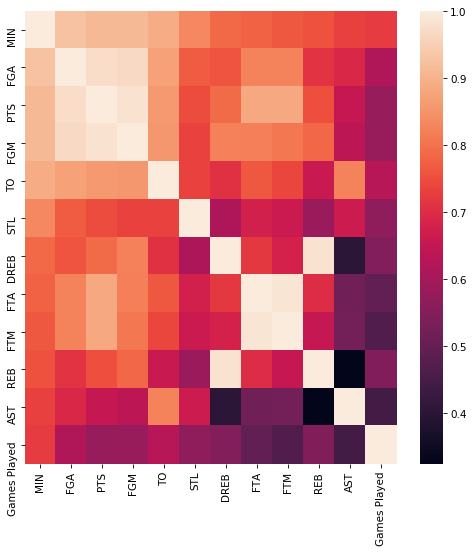

In [51]:
reduced = df.corr().abs()["MIN"].nlargest(12).index
corr_matrix = df[reduced].corr()

plt.figure(figsize=(8, 8), dpi=75)
sns.heatmap(corr_matrix)

#### Model

In [52]:
reduced = reduced.drop('MIN')
x_train, x_test, y_train, y_test = train_test_split(x[reduced],y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

RandomForest = RandomForestRegressor(n_estimators=10,random_state=0)
RandomForest.fit(x_train,y_train) 
y_pred_rf = RandomForest.predict(x_test)

In [53]:
print('R2 Scores:')
print('Linear Regression:',r2_score(y_test,y_pred_lr))
print('Random Forest Regressor:',r2_score(y_test,y_pred_rf))

R2 Scores:
Linear Regression: 0.9454973250690095
Random Forest Regressor: 0.9515118347267555


### Part 2 : Classification


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("chronic_kidney_disease.csv")
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Preprocessing

Checking NaN values

In [55]:
df = df.replace('?', np.nan)
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Removing NaN values for increasing reliability

In [56]:
df=df.dropna(axis=0)
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

Encoding categorical values

In [57]:
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0})
df[['htn','dm','cad','pe','ane']]= df[['htn','dm','cad','pe','ane']].apply(LabelEncoder().fit_transform)
df['class'].replace("ckd","1", inplace=True)
df['class'].replace("notckd","0", inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48,70,1.005,4,0,0,1,1,0,117,...,32,6700,3.9,1,0,0,0,1,1,1
9,53,90,1.020,2,0,1,1,1,0,70,...,29,12100,3.7,1,1,0,0,0,1,1
11,63,70,1.010,3,0,1,1,1,0,380,...,32,4500,3.8,1,1,0,0,1,0,1
14,68,80,1.010,3,2,0,1,1,1,157,...,16,11000,2.6,1,1,1,0,1,0,1
20,61,80,1.015,2,0,1,1,0,0,173,...,24,9200,3.2,1,1,1,0,1,1,1


Splitting target and features

In [58]:
y = df.iloc[:,-1:]
x = df.drop(['class'],axis='columns')
print(y.head())
x.head()

    class
3       1
9       1
11      1
14      1
20      1


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,48,70,1.005,4,0,0,1,1,0,117,...,11.2,32,6700,3.9,1,0,0,0,1,1
9,53,90,1.020,2,0,1,1,1,0,70,...,9.5,29,12100,3.7,1,1,0,0,0,1
11,63,70,1.010,3,0,1,1,1,0,380,...,10.8,32,4500,3.8,1,1,0,0,1,0
14,68,80,1.010,3,2,0,1,1,1,157,...,5.6,16,11000,2.6,1,1,1,0,1,0
20,61,80,1.015,2,0,1,1,0,0,173,...,7.7,24,9200,3.2,1,1,1,0,1,1


Splitting train test data

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

y_train = y_train.values.ravel()

#### Model

Logistic Regression Accuracy: 0.96875


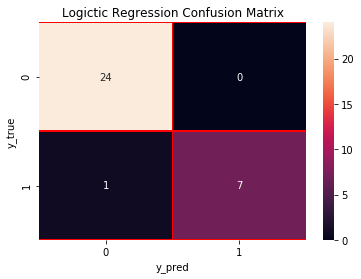

In [60]:
logr = LogisticRegression(random_state=0, max_iter = 100)
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Logistic Regression Accuracy:', accuracy_score(y_test,y_pred))

sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logictic Regression Confusion Matrix")
plt.show()

Random Forest Classifier Accuracy: 1.0


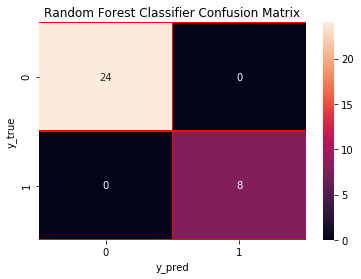

In [61]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)
cm_rf=confusion_matrix(y_test,y_pred_rf)
print('Random Forest Classifier Accuracy:', accuracy_score(y_test,y_pred_rf))

sns.heatmap(cm_rf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

Naive Bayes Accuracy: 1.0


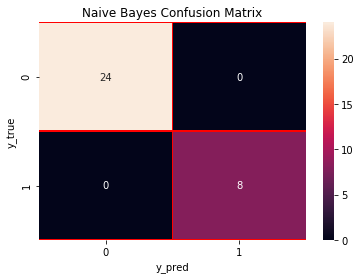

In [62]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
cm_nb=confusion_matrix(y_test,y_pred_nb)
print('Naive Bayes Accuracy:', accuracy_score(y_test,y_pred_nb))

sns.heatmap(cm_nb,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

### Part 3 : Clustering

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

df = pd.read_csv("PlayerPlayingPositionData.csv",index_col=0)
df = df.drop(['ID','Preferred Positions'],axis=1)
df

,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,44.0,28.0,29.0,45.0,38.0,44.0,31.0,28.0,38.0,29.0,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,45.0,46.0,47.0,43.0,45.0,45.0,47.0,46.0,45.0,47.0,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


In [64]:
df.isnull().sum()

CAM    2029
CB     2029
CDM    2029
CF     2029
CM     2029
LAM    2029
LB     2029
LCB    2029
LCM    2029
LDM    2029
LF     2029
LM     2029
LS     2029
LW     2029
LWB    2029
RAM    2029
RB     2029
RCB    2029
RCM    2029
RDM    2029
RF     2029
RM     2029
RS     2029
RW     2029
RWB    2029
ST     2029
dtype: int64

In [65]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(missing_values=np.nan, strategy = 'mean')    

imputer = imputer.fit(df)
df = imputer.transform(df)
df

array([[89., 53., 62., ..., 91., 66., 92.],
       [92., 45., 59., ..., 91., 62., 88.],
       [88., 46., 59., ..., 89., 64., 84.],
       ...,
       [44., 28., 29., ..., 44., 32., 45.],
       [45., 46., 47., ..., 44., 46., 41.],
       [29., 45., 38., ..., 29., 38., 31.]])

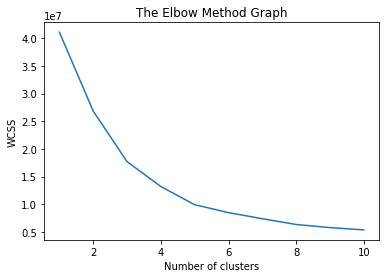

In [66]:
wcss_list = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state= 123)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)

plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1,11),wcss_list)
plt.show()

y_kmeans: [1 1 1 ... 4 2 2]
kmeans inertia: 9926361.107729021


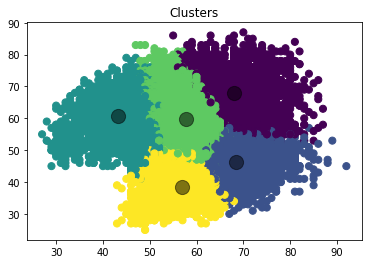

In [67]:
kmeans = KMeans (n_clusters = 5, init = 'k-means++')
y_kmeans=kmeans.fit_predict(df)
print("y_kmeans:",y_kmeans)
print("kmeans inertia:",kmeans.inertia_)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Clusters')
plt.show()